# A/B Testing - An example in Python

Let's start with explaining what is A/B testing. <br><br>An A/B testing is normally a controlled experiment where some of change needs to be assessed for effectiveness. <br>Some typical example of changes where an A/B testing can be used are<br>
<ul>
  <li><b>Web design</b> - Where a new screen design is being considered</li>
  <li><b>User Interface design</b> - Where a new process is being considered</li>
  <li><b>Product Pricing</b> - Where a new price plan is being tested</li>
</ul>
<br>


So let use a website as an example for the testing process. We have a web page where there is a button that allows someone to purchase a license for a software package.<br><br>
We have the current button which is yellow and then we have the proposed improved button which is blue. However, the question remains - will this new blue button improve the rate of users clicks on the button at the end of the day - this is where A/B testing can be used.

<img src='https://github.com/therolfe/Git/blob/master/AB%20Pic.jpg?raw=true'>

In the above example, you measure the effect of the change on the web site (the new blue button) by measuring the number of button clicks per 1000 views (<b>the variant</b>) against the number of clicks we were getting on the old site layout (<b>the control</b>). <br> <br>Normally the web traffic would be split with half of traffic seeing the new button (<b>test group</b>) and the other half seeing the old unchanged button (<b>control group</b>).
                                                                                                                        
                                                                                                        

<h2>The Importance of Variance in the experiment</h2>

Variance is an important factor that needs to be considered in A/B testing strategies. The essentially boils down to making sure the test sets of the variant (the new button) and the control set is large enough to confidently state that the change to the website is driving more business. Smaller testing groups can be greatly affected by random things occurring such as for example, if there is an unusual rush of traffic on the site or a large quantity is bought at once using the test button -  this may skew the results of the experiment. <br><br>It is also important to ensure the what exactly you are measuring the success of the change. If its price of good sold using the button - a larger order may will only still have to of clicked the button once and this may affect the overall test results. In this case, it would be wiser to use orders count as a conversion measure. 

<h2>T-Tests and P-Values</h2>

The Basis for T-Tests and P-Values to determine the significance of the results. How can we know that our test set was large enough and the results are real and can be trusted?

T-Tests are a measure of the difference between the two data sets in measured in terms of standard error.The size of the differnce is relative to the variance in the data. A high T-Test value would point there being a real differnce between teh two datasets.

P-Values are the probability of the both tests satisfying the 'Null hypothesis'. In other words, the P-value measures the probability that there is no impact on the click through rate and the change is not causing different behaviour. A <u>low P-Value indicates there is a low probability of the change having a low effect on the traffic</u> - so a low P-Value is a good thing to see in this case.              
                          

So in our experiment, we want to see a combination of a High T-Test value and a low P-Value. This would imply that there was a good result from the experiment.            

<h2>Lets put this into practice</h2>

Let's create 2 dummy data sets - both simulating a series of collected data from an A/B test like we have described above. We can use Numpy to create a random data set where the mean of the random data is 25, and can only be under 5 standard deviations from this mean, then for 1,000 points.

In [5]:
import numpy as np
from scipy import stats

A = np.random.normal(25.0, 5.0, 10000)
B = np.random.normal(26.0, 5.0, 10000)

In [6]:
Let us examine the B data set to check if it has a normal distribution. We can plot it in Seaborn using a Distplot

array([ 16.5213705 ,  27.10610043,  27.45056316, ...,  17.17041288,
        25.04392006,  23.38219196])

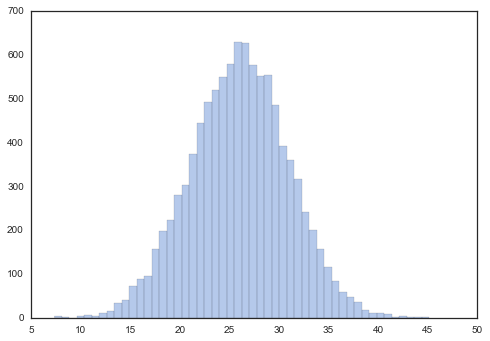

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True) # Bolier plate stuff for seaborn

#create the plot itself
sns.distplot(B, kde=False, color="b") 

Perfect the data is a normal distribution with a perfect bell curve. Now let us use the Stats package fromSicpy. 
This will allow us to examine the diffence between the data sets A & B in terms of T-Tests and P-Values

In [11]:
stats.ttest_ind(A, B)

Ttest_indResult(statistic=-13.726260062764215, pvalue=1.1038549759131564e-42)

A high t value means there's probably a real difference between the two sets; you have "significance". The P-value is a measure of the probability of an observation lying at extreme t-values; so a low p-value also implies "significance." If you're looking for a "statistically significant" result, you want to see a very low p-value and a high t-statistic. We ignore the minus on the statisic score as the number is more important. <br><br>Next, We can set the B data set to test what happens when the datasets are the same and the Null hypostheses is correct. To do this we will  use the same imputs into the random number function from numpy.

A high t value means there's probably a real difference between the two sets; you have "significance". The P-value is a measure of the probability of an observation lying at extreme t-values; so a low p-value also implies "significance." If you're looking for a "statistically significant" result, you want to see a very low p-value and a high t-statistic. We ignore the minus on the statistic score as the absolute value of the number is more important. <br><br>Next, We can set a new data set to test what happens when the datasets are the same (A and the new data set C) and the Null hypothesis is correct. To do this we will  use the same inputs into the random number function from numpy.

In [19]:
C = np.random.normal(25.0, 5.0, 10000) # same as the A dataset.

Now we rerun the stats test... 

In [20]:
stats.ttest_ind(A, C)

Ttest_indResult(statistic=0.26918554239772297, pvalue=0.78778968237601932)

Now, our t-statistic is much lower and our p-value is really high. This supports the null hypothesis - that there is no real difference in behavior between these two sets.<br><br>Just as a sanity check if we pass the same data set into the Ttest_ind function we should get a perfect match - which is a T score of 0 and an P-value of 1.


In [21]:
stats.ttest_ind(A, A)

Ttest_indResult(statistic=0.0, pvalue=1.0)

Thanks for reading...